In [1]:
# ITCS 6162: Project - Pump It Up
# Author: Aditya Gupta, Rekhansh Panchal
# The project uses Python for data cleaning and visuals.
# R is used for modelling and prediction of water pump functionalities.

In [2]:
# Importing files
import matplotlib.pyplot as plt;
import pandas as pd;
import numpy as np;
import ipywidgets as wg;
import plotly.plotly as py;
from plotly.graph_objs import *
from plotly.widgets import GraphWidget
from __future__ import print_function;
from ipywidgets import interact, interactive, fixed, interact_manual;
from IPython.display import display, clear_output, Image
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

C:\Users\Rekhansh\Miniconda3\lib\site-packages\IPython\html.py:14: ShimWarning:

The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.

C:\Users\Rekhansh\Miniconda3\lib\site-packages\plotly\widgets\graph_widget.py:13: UserWarning:

IPython.utils.traitlets has moved to a top-level traitlets package.



<IPython.core.display.Javascript object>

In [3]:
valueLocation = r"C:\Users\Rekhansh\Documents\Python Scripts\training_set_values.csv"
labelLocation = r"C:\Users\Rekhansh\Documents\Python Scripts\training_set_label.csv"

# Load data.
df = pd.read_csv(valueLocation)
labels = pd.read_csv(labelLocation)

# Merge data and labels together in one dataframe.
df = pd.merge(df, labels, on='id')
dfOld = df.copy(deep = True)
del labels

In [4]:
# Understanding the data quantity
df.shape

(59400, 41)

In [5]:
# The Training Data includes 59400 rows with 41 columns on individial entities.
# Now, we'll check for any missing values and find their count.
df.apply(lambda x: sum(x.isnull()))

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [6]:
# We can see few columns contain null values. Hence, we need to fix them before beginning any sort of Analysis on the data.

# Starting with value "funder"
df.funder.value_counts()

Government Of Tanzania       9084
Danida                       3114
Hesawa                       2202
Rwssp                        1374
World Bank                   1349
Kkkt                         1287
World Vision                 1246
Unicef                       1057
Tasaf                         877
District Council              843
Dhv                           829
Private Individual            826
Dwsp                          811
0                             777
Norad                         765
Germany Republi               610
Tcrs                          602
Ministry Of Water             590
Water                         583
Dwe                           484
Netherlands                   470
Hifab                         450
Adb                           448
Lga                           442
Amref                         425
Fini Water                    393
Oxfam                         359
Wateraid                      333
Rc Church                     321
Isf           

In [7]:
# Creating a function to categorize:
# Keep high frequency values and replace low frequency values with new category "other"
def wrangler_function(row,colName,highFrequencyEntity):  
    if row[colName] in highFrequencyEntity:
        return row[colName]
    else:
        return 'other'

In [8]:
# Categorizing funder variable
highFrequencyEntity = ('Government Of Tanzania','Danida','Hesawa','Rwssp','World Bank','Kkkt','World Vision','Unicef')        
df['funder'] = df.apply(lambda row: wrangler_function(row,'funder',highFrequencyEntity), axis=1)
df.funder.value_counts()

other                     38687
Government Of Tanzania     9084
Danida                     3114
Hesawa                     2202
Rwssp                      1374
World Bank                 1349
Kkkt                       1287
World Vision               1246
Unicef                     1057
Name: funder, dtype: int64

In [11]:
# Exploring "installer" variable
df.installer.value_counts()

other         36179
DWE           17402
Government     1825
RWE            1206
DANIDA         1050
KKKT            898
Hesawa          840
Name: installer, dtype: int64

In [12]:
# Categorizing installer variable
highFrequencyEntity = ('DWE','Government','RWE','DANIDA','KKKT','Hesawa')        
df['installer'] = df.apply(lambda row: wrangler_function(row,'installer',highFrequencyEntity), axis=1)
df.installer.value_counts()

other         36179
DWE           17402
Government     1825
RWE            1206
DANIDA         1050
KKKT            898
Hesawa          840
Name: installer, dtype: int64

In [13]:
# Checking number of unique values to categorize subvillage
print('Number of Sub-villages: ', len(df.subvillage.value_counts()))

Number of Sub-villages:  19287


In [14]:
# As there are so many unique values, high frequency values will not be able to dominate other variables. 
# Hence, it is advisable to remove the column from dataset.
df = df.drop('subvillage', axis=1)

In [15]:
# Checking "public_meeting" variable
df.public_meeting.value_counts()

True     51011
False     5055
Name: public_meeting, dtype: int64

In [16]:
# But, total values are 59400. Hence, there are missing values. Filling those values with 'Unknown'
# Number of missing values ~ 2000. Replacing them by mode value.
df.public_meeting = df.public_meeting.fillna('TRUE')

In [17]:
# Checking "scheme_management" variable
print(len(df.scheme_management.value_counts()))
df.scheme_management.value_counts()

12


VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [18]:
# Since ther 'scheme_management' variable includes high frequency and few low as well. We'll categorize it.
highFrequencyEntity = ('VWC','WUG','Water authority','WUA','Water Board','Parastatal','Private Operator','Company')        
df['scheme_management'] = df.apply(lambda row: wrangler_function(row,'scheme_management',highFrequencyEntity), axis=1)
df.scheme_management.value_counts()

VWC                36793
other               5876
WUG                 5206
Water authority     3153
WUA                 2883
Water Board         2748
Parastatal          1680
Company             1061
Name: scheme_management, dtype: int64

In [19]:
# Checking the unique values for recorded_by column.
df['recorded_by'].unique()

array(['GeoData Consultants Ltd'], dtype=object)

In [20]:
# Calculating the number of entries where amount_tsh is zero.
len(df[df.amount_tsh==0])

41639

In [21]:
# Dropping the amount_tsh column.
df.drop('amount_tsh', axis=1, inplace=True)

In [22]:
# Dropping the recorded_by column as it has only one value filled in our data.
df.drop('recorded_by', axis=1, inplace=True)

In [23]:
# Calculating the number of entries where amount_tsh is zero.
len(df[df.permit==0])
# Replacing by mode.
df.permit = df.permit.fillna('True')

In [24]:
# Removing scheme_name as there are too many different scheme types.
df.drop('scheme_name', axis=1, inplace=True)

In [25]:
# Since ther 'scheme_management' variable includes high frequency and few low as well. We'll categorize it.
highFrequencyEntity = ('vwc', 'wug', 'water board', 'wua', 'private operator','parastatal')        
df['management'] = df.apply(lambda row: wrangler_function(row,'management',highFrequencyEntity), axis=1)
df.management.value_counts()

vwc                 40507
wug                  6515
other                3171
water board          2933
wua                  2535
private operator     1971
parastatal           1768
Name: management, dtype: int64

In [26]:
# Also, we need to streamline the similar variables by removing one of them.
# As, those variables are highly correlated.

# Choosing one from payment and payment type.
df.drop('payment', axis=1, inplace=True)

# Choosing one from water_quality and quality group.
df.drop('quality_group', axis=1, inplace=True)

# Choosing one from quantity and quantity group.
df.drop('quantity_group', axis=1, inplace=True)

# Choosing one from waterpoint_type and waterpoint_type_group.
df.drop('waterpoint_type_group', axis=1, inplace=True)

# Choosing one from source_class, source_type, and source.
df.drop('source', axis=1, inplace=True)
df.drop('source_class', axis=1, inplace=True)

# Choosing one from extraction_type, extraction_type_group, and extraction_type_class.
df.drop('extraction_type', axis=1, inplace=True)
df.drop('extraction_type_group', axis=1, inplace=True)

# Choosing one from management_group and management.
df.drop('management_group', axis=1, inplace=True)

# Removing column 'num_private' as majority of the values are zero.
df.drop('num_private', axis=1, inplace=True)

# Removing location related variables and other variables.
df = df.drop(['lga', 'longitude', 'latitude', 'region_code', 'district_code','ward','id','wpt_name','gps_height','date_recorded'], axis=1)
 
# Removing column 'population' as majority of the values are zero.
df.drop('population', axis=1, inplace=True)

In [27]:
# Now, construction year could play a major role in prediction.
# However, there are about 20000 values which are "0".
# So, we'll remove those entries.
df = df[df.construction_year != 0]
df.construction_year.value_counts()
yearMax = df.construction_year.max()
df.construction_year = yearMax - df.construction_year

In [28]:
#vals_to_replace = {'functional':2, 'functional needs repair':1,'non functional':0}

#df['status_group']  = df.status_group.replace(vals_to_replace)

In [29]:
# Checking for null values, if any are remaining.
df.apply(lambda x: sum(x.isnull()))

funder                   0
installer                0
basin                    0
region                   0
public_meeting           0
scheme_management        0
permit                   0
construction_year        0
extraction_type_class    0
management               0
payment_type             0
water_quality            0
quantity                 0
source_type              0
waterpoint_type          0
status_group             0
dtype: int64

In [30]:
# As seen from above output, nulls and similar variables are removed.
# Now, we need to remove variables which have high frequency of unique values. As, these variables may not help in prediction.

str_cols = df.select_dtypes(include = ['object'])
str_cols.apply(lambda x: len(x.unique()))

funder                    9
installer                 7
basin                     9
region                   17
public_meeting            3
scheme_management         8
permit                    3
extraction_type_class     7
management                7
payment_type              7
water_quality             8
quantity                  5
source_type               7
waterpoint_type           7
status_group              3
dtype: int64

In [31]:
t = ["status_group", "funder", "installer", "basin", "region", "public_meeting", "scheme_management", "permit", "construction_year", "extraction_type_class", "management", "payment_type", "water_quality", "quantity", "source_type", "waterpoint_type"]
w = wg.Select(options = t,value="status_group",description="Select Variable to visualize",)
def on_change(change):
    if change["type"] == "change" and change["name"] == "value":
        fig, axs = plt.subplots(1,2)
        a = change["new"]
        dfOld[a].value_counts().plot(ax=axs[0],kind='bar')
        df[a].value_counts().plot(ax=axs[1],kind='bar')
w.observe(on_change)
display(w)

In [32]:
#Now, we have successfully cleaned the data. And will model the data.
df.to_csv(r'C:\Users\Rekhansh\Documents\Python Scripts\cleanedTraining.csv', index=False)

In [1]:
#-----------------------------------R Code starts here--------------------------------------------------

library(randomForest)
library(ggplot2)
setwd("C:\\Users\\Rekhansh\\Documents\\Python Scripts")
training <- read.csv(file ="cleanedTraining.csv")

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.
Warning message:
"package 'ggplot2' was built under R version 3.3.3"
Attaching package: 'ggplot2'

The following object is masked from 'package:randomForest':

    margin



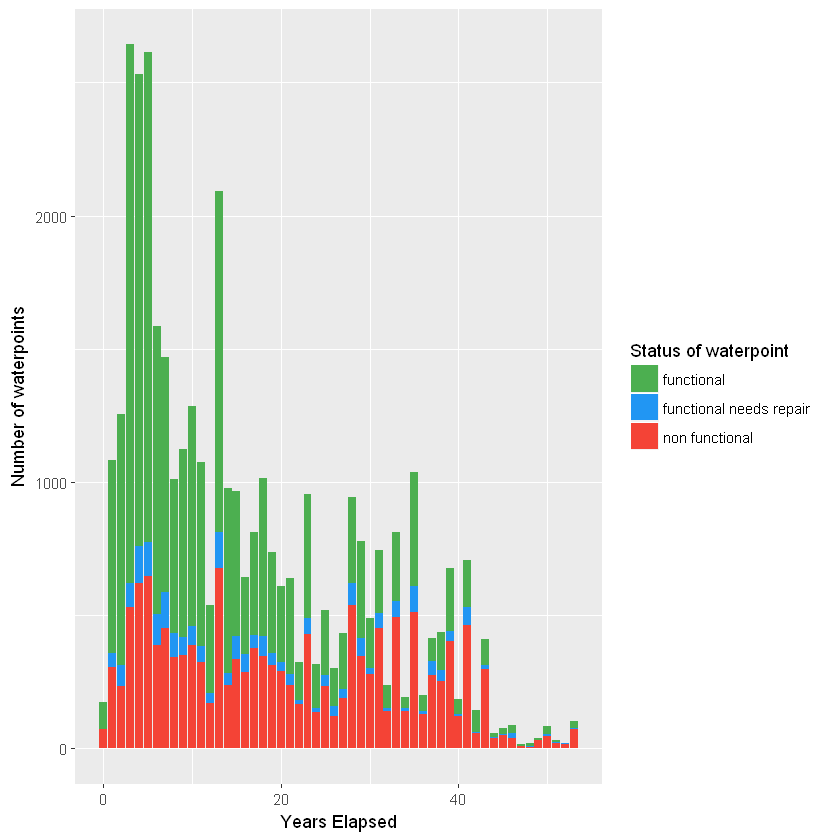

In [2]:
# Creating color scale
color_label <- c("#4CAF50", "#2196F3", "#F44336")
# Representing water points by number of years passed.
ggplot(subset(training, construction_year >= 0),
    aes(x = construction_year, fill = status_group)) + 
    geom_bar() +
    xlab("Years Elapsed")  +
    ylab("Number of waterpoints") +
    labs(fill = "Status of waterpoint") +
    scale_fill_manual(values=color_label)

In [ ]:
set.seed(123)
training$status_group = factor(training$status_group)

In [ ]:
ind<-sample(2,nrow(training),replace=TRUE,prob=c(0.80,0.20))
training_data<-training[ind==1,]
test_data<-training[ind==2,]

In [ ]:
model_forest <- randomForest(status_group ~ 
                             funder + 
                             installer + 
                             basin + 
                             region + 
                             quantity + 
                             public_meeting + 
                             scheme_management+
                             permit+
                             construction_year+
                             extraction_type_class+
                             management+
                             payment_type+
                             water_quality+
                             quantity+
                             source_type+
                             waterpoint_type, 
                             data = training, 
                             importance = TRUE,
                             ntree = 100,
                             nodesize = 2)

In [ ]:
# Predict the values in training using the random forest model 
pred_forest_training <- predict(model_forest, test_data)

In [ ]:
# Observe the first few predictions rows
head(pred_forest_training)
str(pred_forest_training)

In [ ]:
# Creating a confusion matrix to evaluate the model (compare the predicted labels to the actual labels)
cm <- table(pred_forest_training, test_data$status_group)
cm

# Calculate accuracy
round(sum(diag(cm))/sum(cm), 4)

In [ ]:
# Can evaluate the model with more statistics calculated automatically
library(caret)
confusionMatrix(pred_forest_training, test_data$status_group)

In [ ]:
# Evaluating the importance of each variable
importance(model_forest)
varImpPlot(model_forest)

In [ ]:
#Thank you!